# Install and Import Required Libraries

In [ ]:
!pip install lime
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=bc54478f6f2e52b34e5bebe0df9e11d4e4fc3fc7035d951518207455569fda1a
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 7.5 MB/s eta 0:00:00


In [ ]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 18.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.4.1 which is incompatible.


In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Concatenate, BatchNormalization, GRU
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.metrics import AUC
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping ,ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization

import shap
from wordcloud import WordCloud
import lime
from lime.lime_text import LimeTextExplainer
import time
from datetime import timedelta


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sentiment_and_topics.csv')

In [ ]:
df.head()

,Text,ed_label_0,ed_label_1,oh_label,preprocessed_text,entities,tagged_text,pos_tags,cleaned_text,custom_tokens,sentiment_polarity,sentiment_subjectivity,dominant_topic
0,This One can make an analogy in mathematical t...,0.9,0.1,0,This One can make an analogy in mathematical t...,"[('Gaussian', 'NORP'), ('three', 'CARDINAL'), ...",This_DET One_PRON can_AUX make_VERB an_DET ana...,"[('This', 'DET'), ('One', 'PRON'), ('can', 'AU...",This One can make an analogy in mathematical t...,"['This', 'One', 'can', 'make', 'an', 'analogy'...",0.098611,0.231944,9
1,Clarification for you and Zundarks right i sho...,1.0,0.0,0,Clarification for you and [PERSON] right i sho...,"[('Zundarks', 'PERSON'), ('Wikipedia', 'ORG'),...",Clarification_NOUN for_ADP you_PRON and_CCONJ ...,"[('Clarification', 'NOUN'), ('for', 'ADP'), ('...",Clarification for you and Zundarks right i sho...,"['Clarification', 'for', 'you', 'and', 'Zundar...",0.185714,0.458631,6
2,Elected or Electoral <allcaps> JHK </allcaps>,1.0,0.0,0,Elected or Electoral <allcaps> <allcaps> [ORG]...,"[('JHK', 'ORG')]",Elected_VERB or_CCONJ Electoral_PROPN <_PROPN ...,"[('Elected', 'VERB'), ('or', 'CCONJ'), ('Elect...",Elected or Electoral allcaps JHK allcaps,"['Elected', 'or', 'Electoral', 'allcaps', 'JHK...",0.000000,0.000000,7
3,This is such a fun entry Devotchka I once had ...,1.0,0.0,0,This is such a fun entry Devotchka I once had ...,"[('Korea', 'GPE'), ('USAEnglish', 'NORP'), ('B...",This_PRON is_AUX such_DET a_DET fun_NOUN entry...,"[('This', 'PRON'), ('is', 'AUX'), ('such', 'DE...",This is such a fun entry Devotchka I once had ...,"['This', 'is', 'such', 'a', 'fun', 'entry', 'D...",0.090344,0.303553,9
4,Please relate the ozone hole to increases in c...,0.8,0.2,0,Please relate the ozone hole to increases in c...,"[('Ed Poor', 'PERSON')]",Please_INTJ relate_VERB the_DET ozone_NOUN hol...,"[('Please', 'INTJ'), ('relate', 'VERB'), ('the...",Please relate the ozone hole to increases in c...,"['Please', 'relate', 'the', 'ozone', 'hole', '...",0.000000,0.000000,9


In [ ]:
print(df['cleaned_text'].dtype)
print(df['cleaned_text'].isnull().sum())

object
50


In [ ]:
df['cleaned_text'] = df['cleaned_text'].astype(str).replace('nan', '')

In [ ]:
# Prepare the text data
text_data = df['cleaned_text'].values  # or 'custom_tokens' if it's already tokenized
max_words = 10000
max_len = 200

In [ ]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(text_data)
X_text = tokenizer.texts_to_sequences(text_data)
X_text_pad = pad_sequences(X_text, maxlen=max_len)

In [ ]:
# Prepare additional features
additional_features = df[['sentiment_polarity', 'sentiment_subjectivity', 'dominant_topic']].values

# Normalize additional features
scaler = StandardScaler()
additional_features_scaled = scaler.fit_transform(additional_features)

<ipython-input-13-7fa9c4966afa>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Figure size 1500x800 with 0 Axes>

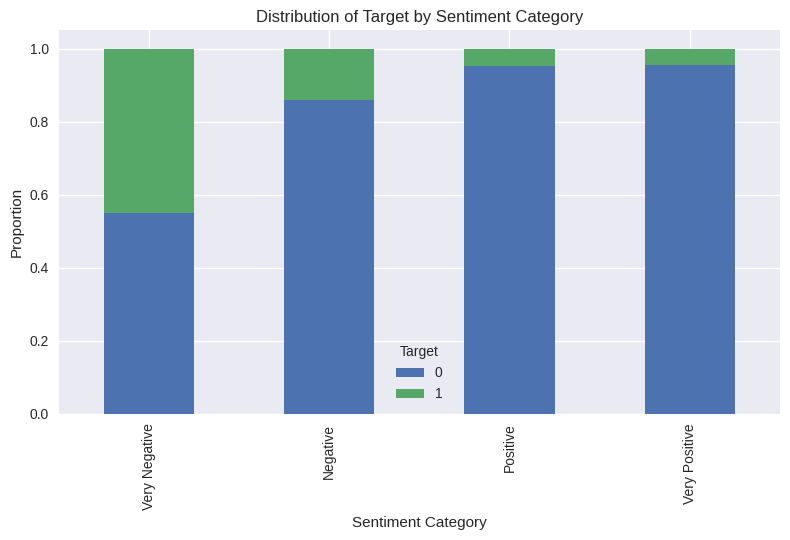

<Figure size 1200x600 with 0 Axes>

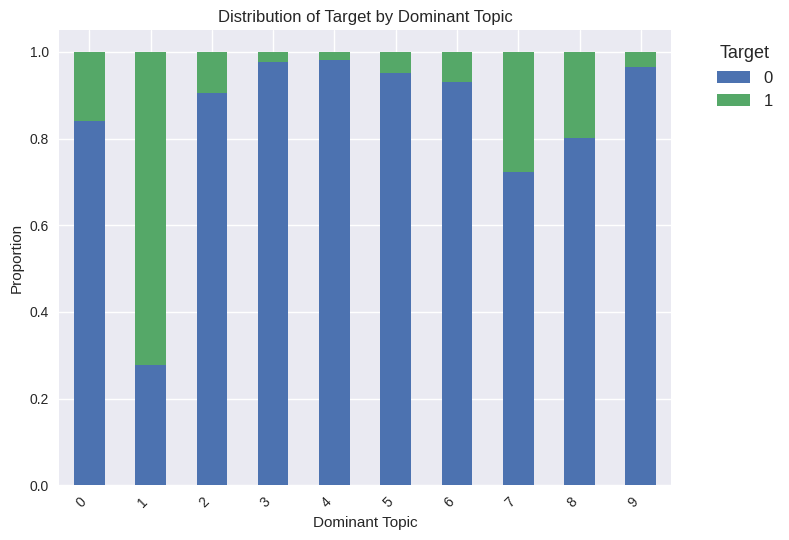

<Figure size 800x550 with 0 Axes>

In [ ]:
# Set up the plot style
plt.style.use('seaborn')

# 1. Stacked bar chart for target and sentiment
plt.figure(figsize=(15, 8))
df['sentiment_category'] = pd.cut(df['sentiment_polarity'],
                                  bins=[-1, -0.5, 0, 0.5, 1],
                                  labels=['Very Negative', 'Negative', 'Positive', 'Very Positive'])
sentiment_target = pd.crosstab(df['sentiment_category'], df['oh_label'], normalize='index')
sentiment_target.plot(kind='bar', stacked=True)
plt.title('Distribution of Target by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Proportion')
plt.legend(title='Target')
plt.tight_layout()
plt.show()

# 2. Stacked bar chart for dominant topic and target
plt.figure(figsize=(12, 6))
topic_target = pd.crosstab(df['dominant_topic'], df['oh_label'], normalize='index')
topic_target.plot(kind='bar', stacked=True)
plt.title('Distribution of Target by Dominant Topic')
plt.xlabel('Dominant Topic')
plt.ylabel('Proportion')
plt.legend(title='Target', title_fontsize='13', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()

## Split data and define Target Variable

In [ ]:
# define target variable
y = df['oh_label'].values

# Split the data
X_text_train, X_text_test, X_feat_train, X_feat_test, y_train, y_test = train_test_split(
    X_text_pad, additional_features_scaled, y, test_size=0.2, random_state=42, stratify=y
)


# The first Model based on Only TEXT data

In [ ]:
# Build the first model
embedding_dim = 100

model_1 = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_1.compile(optimizer=Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy', AUC(name='auc')])

# Compute class weights
class_weights = None
if len(np.unique(y_train)) == 2:  # Binary classification
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = dict(enumerate(class_weights))
else:
    print("Not using class weights (multiclass problem or already balanced)")

# Callbacks
early_stopping = EarlyStopping(monitor='val_auc', patience=5, mode='max', verbose=1)
model_checkpoint = ModelCheckpoint('best_model_1.h5', monitor='val_auc', mode='max', save_best_only=True, verbose=1)

# Record start time
start_time = time.time()

# Train the model
history = model_1.fit(
    X_text_train,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint],
    class_weight=class_weight_dict if class_weights is not None else None,
    verbose=1
)

# Record end time
end_time = time.time()

# Calculate runtime
runtime = end_time - start_time

# Load the best model
model_1.load_weights('best_model_1.h5')

# Print runtime
print(f"Total runtime: {timedelta(seconds=runtime)}")

Epoch 1/50
3191/3194 [============================>.] - ETA: 0s - loss: 0.2937 - accuracy: 0.8886 - auc: 0.9459
Epoch 1: val_auc improved from -inf to 0.96781, saving model to best_model_1.h5
3194/3194 [==============================] - 149s 44ms/step - loss: 0.2937 - accuracy: 0.8886 - auc: 0.9459 - val_loss: 0.1866 - val_accuracy: 0.9280 - val_auc: 0.9678
Epoch 2/50
   5/3194 [..............................] - ETA: 1:23 - loss: 0.2701 - accuracy: 0.9250 - auc: 0.9670

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3194/3194 [==============================] - ETA: 0s - loss: 0.1924 - accuracy: 0.9279 - auc: 0.9765
Epoch 2: val_auc did not improve from 0.96781
3194/3194 [==============================] - 85s 27ms/step - loss: 0.1924 - accuracy: 0.9279 - auc: 0.9765 - val_loss: 0.1689 - val_accuracy: 0.9380 - val_auc: 0.9676
Epoch 3/50
3192/3194 [============================>.] - ETA: 0s - loss: 0.1504 - accuracy: 0.9364 - auc: 0.9852
Epoch 3: val_auc did not improve from 0.96781
3194/3194 [==============================] - 63s 20ms/step - loss: 0.1504 - accuracy: 0.9364 - auc: 0.9853 - val_loss: 0.1865 - val_accuracy: 0.9252 - val_auc: 0.9634
Epoch 4/50
3192/3194 [============================>.] - ETA: 0s - loss: 0.1174 - accuracy: 0.9473 - auc: 0.9903
Epoch 4: val_auc did not improve from 0.96781
3194/3194 [==============================] - 66s 21ms/step - loss: 0.1174 - accuracy: 0.9473 - auc: 0.9903 - val_loss: 0.2811 - val_accuracy: 0.8885 - val_auc: 0.9607
Epoch 5/50
3194/3194 [==============

## Evaluate the First Model

In [ ]:
# Load the best model
model_1.load_weights('best_model_1.h5')

# Evaluate the model
y_pred = model_1.predict(X_text_test)
auc_score = roc_auc_score(y_test, y_pred)
print(f"Test AUC: {auc_score}")

999/999 [==============================] - 8s 8ms/step
Test AUC: 0.9665810846616694


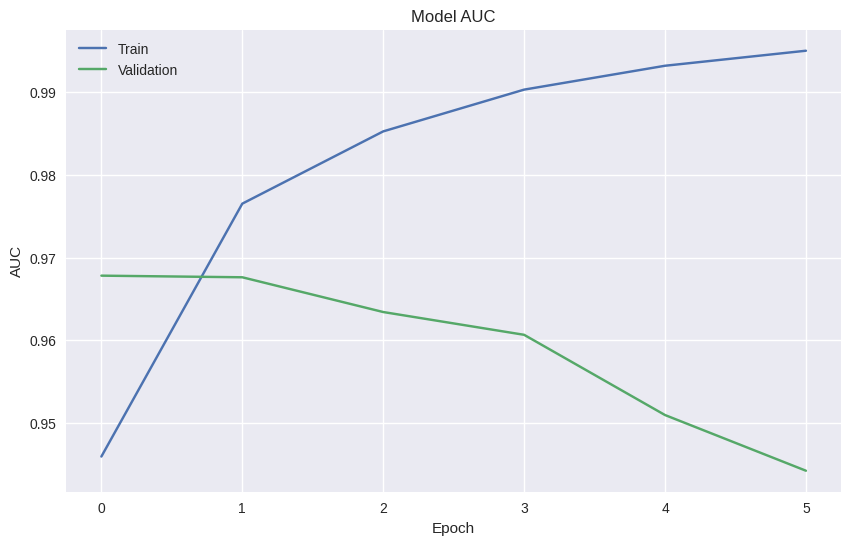

In [ ]:
# Plot AUC over epochs

plt.figure(figsize=(10, 6))
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Model interpretability

157/157 [==============================] - 1s 7ms/step
Top features contributing to toxic predictions:
        Feature    Weight
0        fucked  0.849582
1         idiot  0.823431
2        idiots  0.604680
3      ignorant  0.577306
4           you  0.502817
5          Fuck  0.327045
6          Butt  0.318406
7       fucking  0.288502
8         loser  0.243578
9          Crew  0.190892
10          SEX  0.187695
11    worthless  0.149732
12   sockpuppet  0.144900
13           my  0.130065
14            a  0.120327
15         your  0.117790
16  incompetent  0.073151
17      FUCKING  0.067881
18       FAGGOT  0.066514
19       RACIST  0.061805


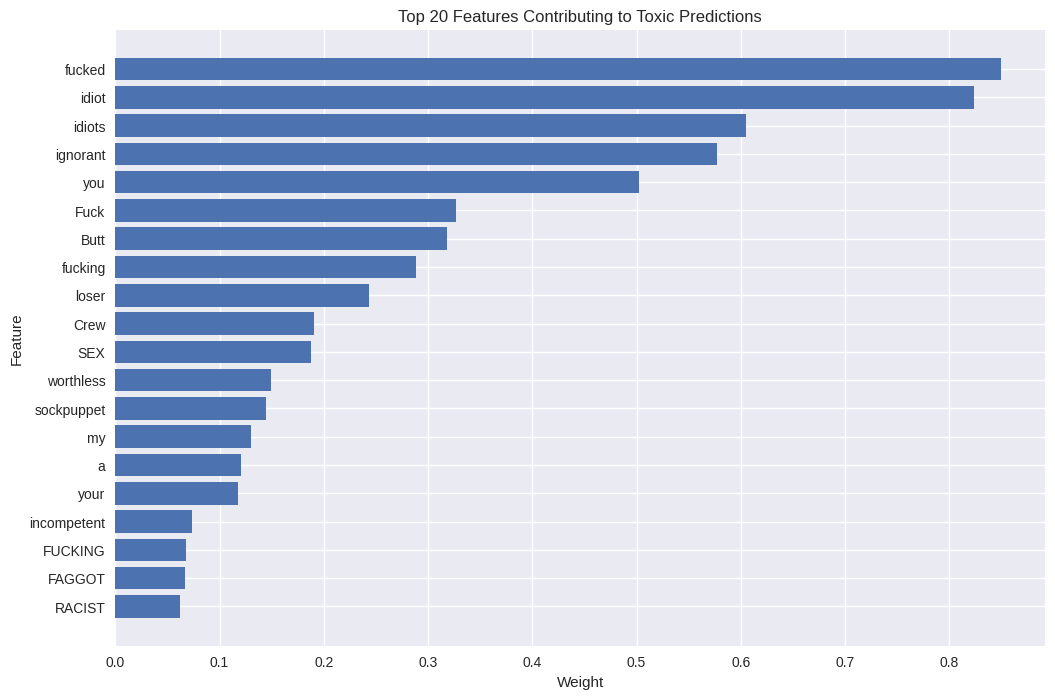

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from lime.lime_text import LimeTextExplainer
from keras.preprocessing.sequence import pad_sequences



# Define a function to preprocess text data
def preprocess_text(instance):
    # Convert text to sequence and pad it
    instance_seq = tokenizer.texts_to_sequences([instance])
    instance_pad = pad_sequences(instance_seq, maxlen=max_len)
    return instance_pad


def predict_with_preprocessing(texts):
    # Preprocess the input texts
    processed_inputs = [preprocess_text(text) for text in texts]
    text_inputs = np.array([inputs.squeeze() for inputs in processed_inputs])

    # Make predictions with only text inputs
    predictions = model_1.predict(text_inputs)

    # Return predictions in the format expected by LIME
    return np.hstack((1 - predictions, predictions))  # For binary classification

# Initialize LIME Text Explainer
explainer = LimeTextExplainer(class_names=['non-toxic', 'toxic'])

# Choose a sample of data to explain
sample_size = 100  # Number of instances to explain
sample_indices = np.random.choice(df.index, sample_size, replace=False)
sample_texts = df['cleaned_text'].iloc[sample_indices].tolist()
sample_labels = df['oh_label'].iloc[sample_indices].tolist()

# Generate LIME explanations and aggregate the results
toxic_feature_importance = Counter()
non_toxic_feature_importance = Counter()

for i, instance in enumerate(sample_texts):
    exp = explainer.explain_instance(instance, predict_with_preprocessing, num_features=10)
    label = sample_labels[i]
    if label == 1:  # Assuming 1 is toxic
        for feature, weight in exp.as_list():
            toxic_feature_importance[feature] += weight

# Convert to DataFrame for analysis
toxic_importance_df = pd.DataFrame(toxic_feature_importance.items(), columns=['Feature', 'Weight'])
toxic_importance_df = toxic_importance_df.sort_values(by='Weight', ascending=False).reset_index(drop=True)


# Display the top features contributing to the model's toxic predictions
print("Top features contributing to toxic predictions:")
print(toxic_importance_df.head(20))


# Plot the feature importance for toxic predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(toxic_importance_df['Feature'].head(20), toxic_importance_df['Weight'].head(20))
plt.gca().invert_yaxis()
plt.title('Top 20 Features Contributing to Toxic Predictions')
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.show()


# The Second Model:

We've kept the two LSTM layers from the original Sequential model in the text input branch.
We've added an additional features input branch, which takes in the scaled additional features.
The outputs of both branches are concatenated before being passed through the final dense layers.
We're using the functional API of Keras (with Model instead of Sequential) to handle multiple inputs.

It's setting up a more complex model that combines text input (processed through embedding and LSTM layers) with additional numerical features. Here's a breakdown of what the code is doing:

It defines the model architecture:

Text input branch with embedding and LSTM layers
Additional features input branch with a dense layer
Concatenation of both branches
Final dense layers for classification


It compiles the model with appropriate optimizer, loss function, and metric.
It sets up callbacks for early stopping and model checkpointing.
It trains the model with the specified parameters and records the training time.


The increased number of epochs (50) combined with early stopping is a good approach to allow the model to train longer if needed while preventing overfitting.

The use of class weights is good for handling imbalanced datasets.

In [ ]:
# Build the second model
embedding_dim = 100

# defining the layers:

# Text input branch
text_input = Input(shape=(max_len,))
embedding = Embedding(max_words, embedding_dim, input_length=max_len)(text_input)
lstm1 = LSTM(64, return_sequences=True)(embedding)
lstm2 = LSTM(32)(lstm1)

# Additional features input branch
feature_input = Input(shape=(additional_features_scaled.shape[1],))
feature_dense = Dense(32, activation='relu')(feature_input)

# Concatenate both branches
concatenated = Concatenate()([lstm2, feature_dense])
dense1 = Dense(64, activation='relu')(concatenated)
dropout = Dropout(0.5)(dense1)
output = Dense(1, activation='sigmoid')(dropout)

# Create the model
model_2 = Model(inputs=[text_input, feature_input], outputs=output)

# Compile the model
model_2.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=[AUC(name='auc')])

# Callbacks
early_stopping = EarlyStopping(monitor='val_auc', patience=5, mode='max', verbose=1)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_auc', mode='max', save_best_only=True, verbose=1)

# Record start time
start_time = time.time()

# Train the model
history2 = model_2.fit(
    [X_text_train, X_feat_train], y_train,
    validation_split=0.2,
    epochs=50,  # Increased epochs, early stopping will prevent overfitting
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint],
    class_weight=class_weight_dict,
    verbose=1
)

# Record end time
end_time = time.time()

# Calculate runtime
runtime = end_time - start_time

# Print runtime
print(f"Total runtime: {timedelta(seconds=runtime)}")



Epoch 1/50
3193/3194 [============================>.] - ETA: 0s - loss: 0.2928 - auc: 0.9461
Epoch 1: val_auc improved from -inf to 0.96971, saving model to best_model.h5
3194/3194 [==============================] - 111s 33ms/step - loss: 0.2929 - auc: 0.9461 - val_loss: 0.2022 - val_auc: 0.9697
Epoch 2/50
   5/3194 [..............................] - ETA: 49s - loss: 0.3321 - auc: 0.9228

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3192/3194 [============================>.] - ETA: 0s - loss: 0.1917 - auc: 0.9769
Epoch 2: val_auc did not improve from 0.96971
3194/3194 [==============================] - 66s 21ms/step - loss: 0.1917 - auc: 0.9769 - val_loss: 0.2207 - val_auc: 0.9685
Epoch 3/50
3192/3194 [============================>.] - ETA: 0s - loss: 0.1523 - auc: 0.9849
Epoch 3: val_auc did not improve from 0.96971
3194/3194 [==============================] - 64s 20ms/step - loss: 0.1522 - auc: 0.9849 - val_loss: 0.2013 - val_auc: 0.9680
Epoch 4/50
3194/3194 [==============================] - ETA: 0s - loss: 0.1189 - auc: 0.9901
Epoch 4: val_auc did not improve from 0.96971
3194/3194 [==============================] - 63s 20ms/step - loss: 0.1189 - auc: 0.9901 - val_loss: 0.1851 - val_auc: 0.9612
Epoch 5/50
3191/3194 [============================>.] - ETA: 0s - loss: 0.0994 - auc: 0.9926
Epoch 5: val_auc did not improve from 0.96971
3194/3194 [==============================] - 60s 19ms/step - loss: 0.0994 - auc:

In [ ]:
# Evaluate the model
y_pred = model_2.predict([X_text_test, X_feat_test])
auc_score = roc_auc_score(y_test, y_pred)
print(f"Test AUC: {auc_score}")

999/999 [==============================] - 10s 9ms/step
Test AUC: 0.9550038492787796


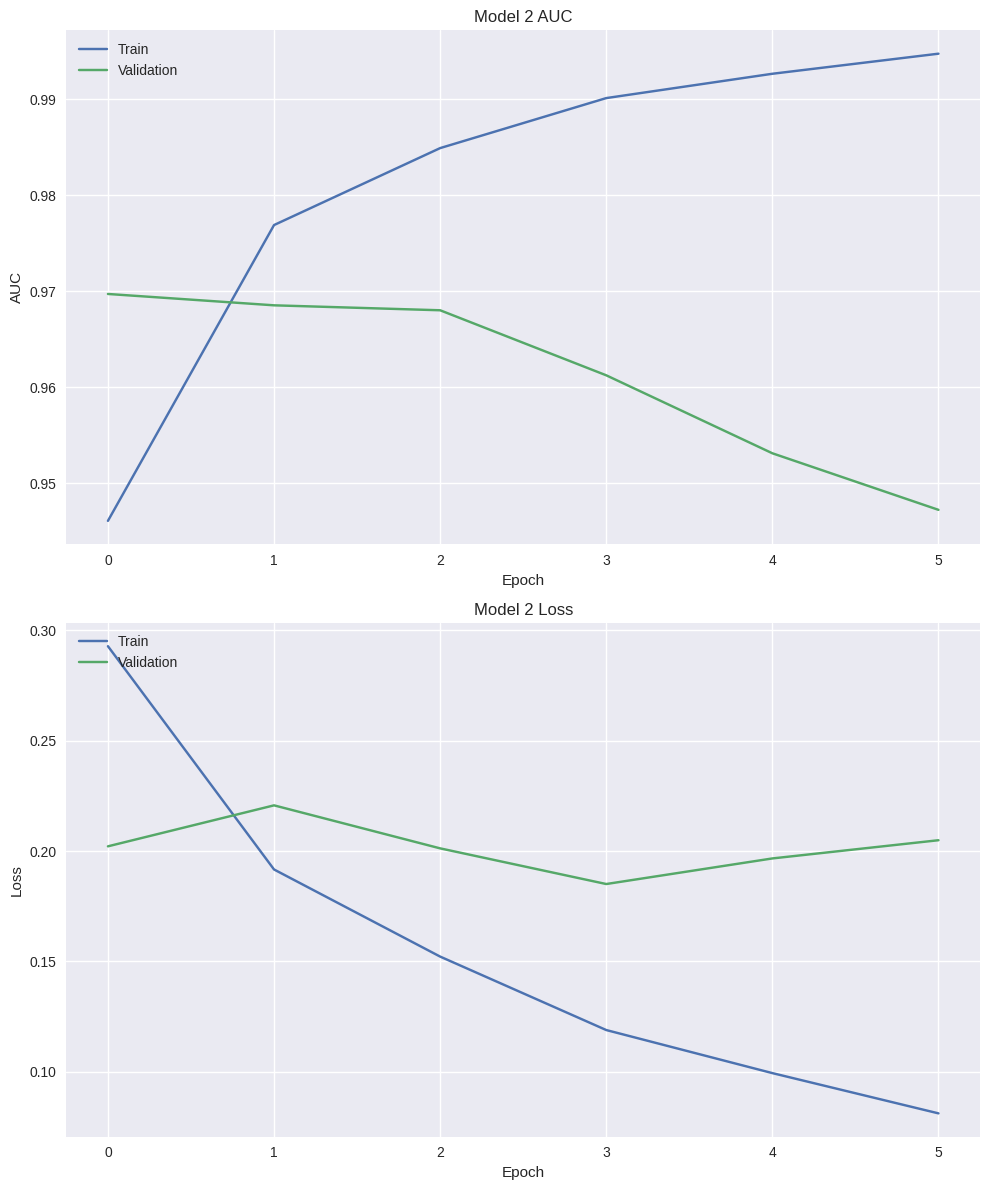

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot AUC
ax1.plot(history2.history['auc'])
ax1.plot(history2.history['val_auc'])
ax1.set_title('Model 2 AUC')
ax1.set_ylabel('AUC')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')

# Plot Loss
ax2.plot(history2.history['loss'])
ax2.plot(history2.history['val_loss'])
ax2.set_title('Model 2 Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

This graph shows the Area Under the Curve (AUC) performance of Model 2 over training epochs for both the training and validation datasets. Here's an analysis of the plot:

Training Performance (Blue Line):

The training AUC starts around 0.945 and rapidly improves.
It shows consistent improvement over epochs, reaching above 0.99 by the end.
This indicates the model is learning well on the training data.


Validation Performance (Orange Line):

The validation AUC starts high (about 0.97) but then decreases over time.
It peaks around epoch 1 and then consistently declines.
By epoch 6, it has dropped to about 0.945.


Overfitting:

The divergence between training and validation performance is a clear sign of overfitting.
The model is memorizing the training data but not generalizing well to new data.


Early Stopping:

The best validation performance is around epoch 1-2.
Early stopping would likely have halted training at this point to prevent overfitting.


Model Adjustments Needed:

To address overfitting, consider:

Increasing regularization ( more dropout, L2 regularization)
Reducing model complexity
Gathering more training data
Using data augmentation techniques




Training Duration:

The graph shows 6 epochs, which is relatively few. The early stopping mechanism likely kicked in due to declining validation performance.

157/157 [==============================] - 1s 9ms/step
Top features contributing to toxic predictions:
         Feature    Weight
0         stupid  0.829932
1       pathetic  0.575456
2           DICK  0.512935
3        allcaps  0.501144
4          areas  0.447053
5           your  0.289363
6         theirs  0.274295
7              a  0.270024
8   motherfucker  0.267213
9          HATES  0.262967
10     stupidity  0.248440
11          life  0.244726
12         admin  0.225618
13       fucking  0.221027
14           YOU  0.186197
15    homosexual  0.176375
16           you  0.169986
17         cunts  0.158050
18          this  0.138015
19          NAZI  0.131863


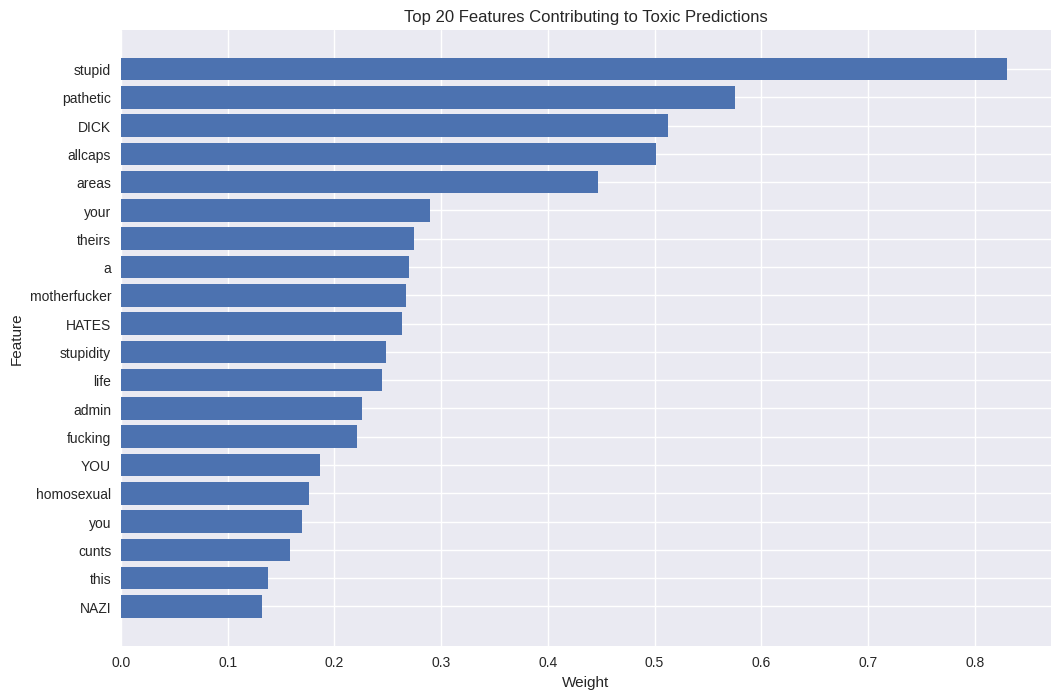

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from lime.lime_text import LimeTextExplainer
from keras.preprocessing.sequence import pad_sequences

# Define a function to preprocess text data
def preprocess_text(instance):
    # Convert text to sequence and pad it
    instance_seq = tokenizer.texts_to_sequences([instance])
    instance_pad = pad_sequences(instance_seq, maxlen=max_len)

    # Create dummy feature array
    dummy_features = np.zeros((1, additional_features_scaled.shape[1]))

    return [instance_pad, dummy_features]

# Define a prediction function wrapper for LIME
def predict_with_preprocessing(texts):
    processed_inputs = [preprocess_text(text) for text in texts]
    text_inputs = np.array([inputs[0] for inputs in processed_inputs]).squeeze()
    feature_inputs = np.array([inputs[1] for inputs in processed_inputs]).squeeze()
    predictions = model_2.predict([text_inputs, feature_inputs])
    return np.hstack((1 - predictions, predictions))  # Adjust shape for LIME

# Initialize LIME Text Explainer
explainer = LimeTextExplainer(class_names=['non-toxic', 'toxic'])

# Choose a sample of data to explain
sample_size = 100  # Number of instances to explain
sample_indices = np.random.choice(df.index, sample_size, replace=False)
sample_texts = df['cleaned_text'].iloc[sample_indices].tolist()
sample_labels = df['oh_label'].iloc[sample_indices].tolist()  # Assuming 'label' contains class labels

# Generate LIME explanations and aggregate the results
toxic_feature_importance = Counter()
non_toxic_feature_importance = Counter()

for i, instance in enumerate(sample_texts):
    exp = explainer.explain_instance(instance, predict_with_preprocessing, num_features=10)
    label = sample_labels[i]
    if label == 1:  # Assuming 1 is toxic
        for feature, weight in exp.as_list():
            toxic_feature_importance[feature] += weight

# Convert to DataFrames for analysis
importance_df_toxic = pd.DataFrame(toxic_feature_importance.items(), columns=['Feature', 'Weight'])
importance_df_toxic = importance_df_toxic.sort_values(by='Weight', ascending=False).reset_index(drop=True)


# Display the top features contributing to each class
print("Top features contributing to toxic predictions:")
print(importance_df_toxic.head(20))


# Plot the feature importance for toxic class
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(importance_df_toxic['Feature'].head(20), importance_df_toxic['Weight'].head(20))
plt.gca().invert_yaxis()
plt.title('Top 20 Features Contributing to Toxic Predictions')
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.show()




# The Third Model using Model Tuning

In [ ]:
# the Third Model

embedding_dim = 50
text_input = Input(shape=(max_len,))

embedding = Embedding(max_words, embedding_dim, input_length=max_len)(text_input)
lstm1 = LSTM(32, return_sequences=True)(embedding)
lstm2 = LSTM(16)(lstm1)
batch_norm1 = BatchNormalization()(lstm2)

feature_input = Input(shape=(additional_features_scaled.shape[1],))
feature_dense = Dense(16, activation='relu', kernel_regularizer=l2(0.01))(feature_input)

concatenated = Concatenate()([batch_norm1, feature_dense])
dense1 = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(concatenated)
dropout = Dropout(0.5)(dense1)
output = Dense(1, activation='sigmoid')(dropout)

model_3 = Model(inputs=[text_input, feature_input], outputs=output)
model_3.compile(optimizer=Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=[AUC(name='auc')])

early_stopping = EarlyStopping(monitor='val_auc', patience=10, mode='max', verbose=1, restore_best_weights=True)
#Implement a learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)


# Record start time
start_time = time.time()

# Train the model
history3 = model_3.fit(
    [X_text_train, X_feat_train], y_train,
    validation_split=0.2,
    epochs=50,  # Increased epochs, early stopping will prevent overfitting
    batch_size=32,
    callbacks=[early_stopping,reduce_lr],
    class_weight=class_weight_dict,
    verbose=1
)

# Record end time
end_time = time.time()

# Calculate runtime
runtime = end_time - start_time

# Print runtime
print(f"Total runtime: {timedelta(seconds=runtime)}")

Epoch 1/50
3194/3194 [==============================] - 156s 47ms/step - loss: 0.3748 - auc: 0.9357 - val_loss: 0.1533 - val_auc: 0.9562 - lr: 0.0010
Epoch 2/50
3194/3194 [==============================] - 71s 22ms/step - loss: 0.2334 - auc: 0.9688 - val_loss: 0.1957 - val_auc: 0.9659 - lr: 0.0010
Epoch 3/50
3194/3194 [==============================] - 71s 22ms/step - loss: 0.1787 - auc: 0.9811 - val_loss: 0.1799 - val_auc: 0.9671 - lr: 0.0010
Epoch 4/50
3194/3194 [==============================] - 64s 20ms/step - loss: 0.1246 - auc: 0.9900 - val_loss: 0.1975 - val_auc: 0.9626 - lr: 2.0000e-04
Epoch 5/50
3194/3194 [==============================] - 63s 20ms/step - loss: 0.1069 - auc: 0.9919 - val_loss: 0.2301 - val_auc: 0.9577 - lr: 2.0000e-04
Epoch 6/50
3194/3194 [==============================] - 66s 21ms/step - loss: 0.0919 - auc: 0.9936 - val_loss: 0.2042 - val_auc: 0.9529 - lr: 1.0000e-04
Epoch 7/50
3194/3194 [==============================] - 63s 20ms/step - loss: 0.0848 - auc: 0

In [ ]:
# Evaluate the model
y_pred = model_3.predict([X_text_test, X_feat_test])
auc_score = roc_auc_score(y_test, y_pred)
print(f"Test AUC: {auc_score}")

999/999 [==============================] - 8s 8ms/step
Test AUC: 0.968052322450071


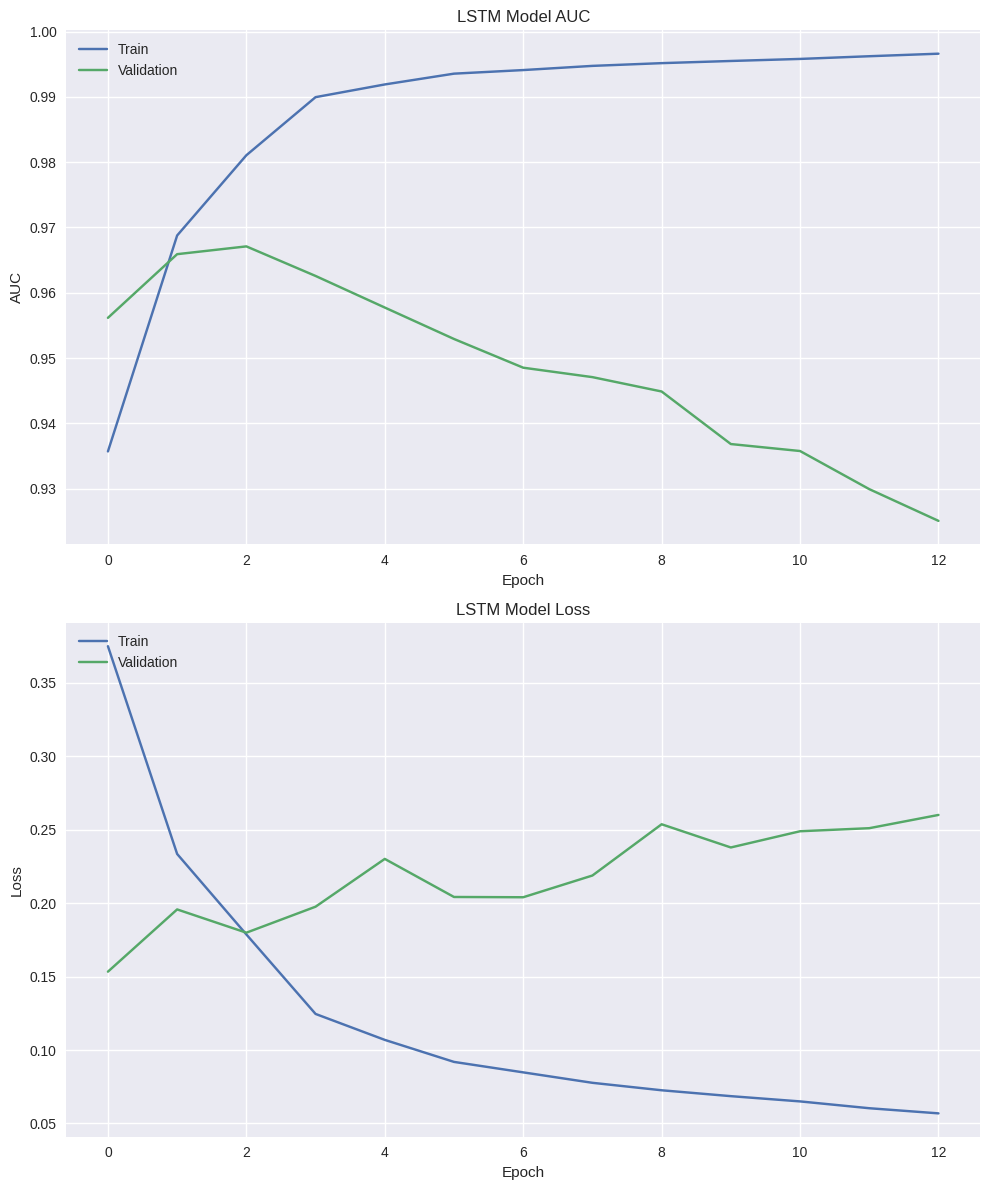

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot AUC
ax1.plot(history3.history['auc'])
ax1.plot(history3.history['val_auc'])
ax1.set_title('LSTM Model AUC')
ax1.set_ylabel('AUC')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')

# Plot Loss
ax2.plot(history3.history['loss'])
ax2.plot(history3.history['val_loss'])
ax2.set_title('LSTM Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

it works better in terms of "Loss" rather than the second model


it shows decrease in Loss over epochs , but still illustrate the overfitting for the model and needs more try to have a better and acceptable result

157/157 [==============================] - 2s 9ms/step
Top features contributing to toxic predictions:
    Feature    Weight
0     idiot  0.958223
1       you  0.843227
2     bitch  0.838868
3       gay  0.660199
4   allcaps  0.566148
5    faggot  0.486936
6      your  0.423798
7      hell  0.393956
8    stupid  0.374014
9      cunt  0.314523
10        A  0.279823
11     fuck  0.262112
12     shut  0.196776
13    mouth  0.172421
14  fucking  0.167476
15      off  0.139168
16        a  0.127162
17      are  0.122542
18     WITH  0.110322
19       me  0.102554


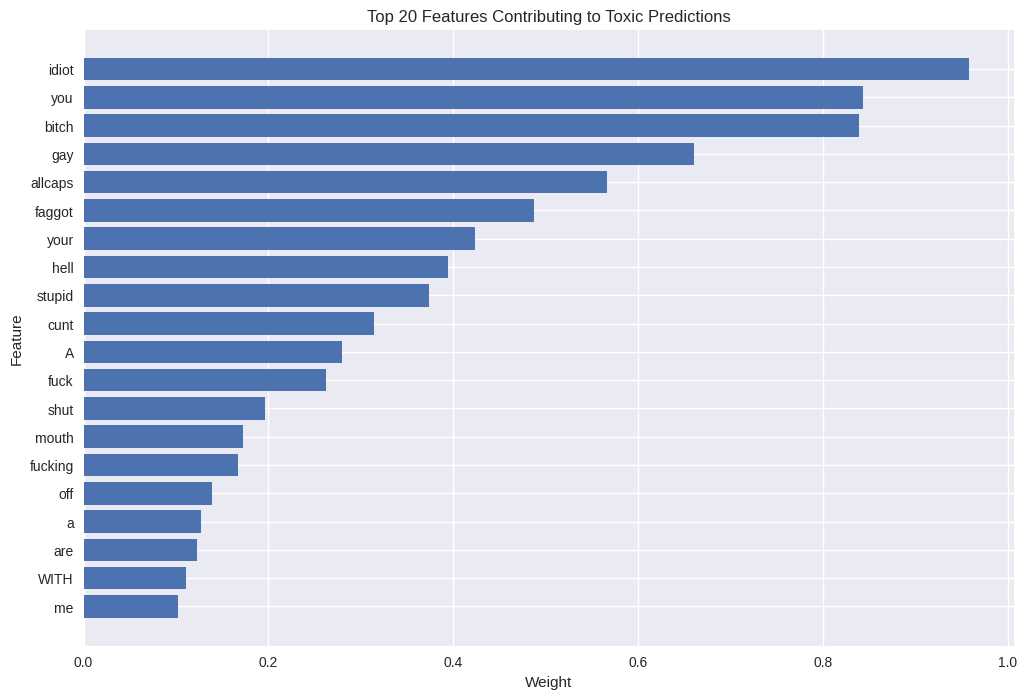

In [ ]:
# LIME interpretability analysis
# Define a function to preprocess text and feature data
def preprocess_text_and_features(instance):
    instance_seq = tokenizer.texts_to_sequences([instance])
    instance_pad = pad_sequences(instance_seq, maxlen=max_len)

    # Use average additional features for LIME explanation
    avg_features = np.mean(additional_features_scaled, axis=0)
    avg_features = np.expand_dims(avg_features, axis=0)

    return [instance_pad, avg_features]

# Define a prediction function wrapper for LIME
def predict_with_preprocessing(texts):
    processed_inputs = [preprocess_text_and_features(text) for text in texts]
    text_inputs = np.array([inputs[0] for inputs in processed_inputs]).squeeze()
    feature_inputs = np.array([inputs[1] for inputs in processed_inputs]).squeeze()
    predictions = model_3.predict([text_inputs, feature_inputs])
    return np.hstack((1 - predictions, predictions))  # Adjust shape for LIME

# Initialize LIME Text Explainer
explainer = LimeTextExplainer(class_names=['non-toxic', 'toxic'])

# Choose a sample of data to explain
sample_size = 100  # Number of instances to explain
sample_indices = np.random.choice(df.index, sample_size, replace=False)
sample_texts = df['cleaned_text'].iloc[sample_indices].tolist()
sample_labels = df['oh_label'].iloc[sample_indices].tolist()  # Assuming 'label' contains class labels

# Generate LIME explanations and aggregate the results
toxic_feature_importance = Counter()
non_toxic_feature_importance = Counter()

for i, instance in enumerate(sample_texts):
    exp = explainer.explain_instance(instance, predict_with_preprocessing, num_features=10)
    label = sample_labels[i]
    if label == 1:  # Assuming 1 is toxic
        for feature, weight in exp.as_list():
            toxic_feature_importance[feature] += weight

# Convert to DataFrames for analysis
importance_df_toxic = pd.DataFrame(toxic_feature_importance.items(), columns=['Feature', 'Weight'])
importance_df_toxic = importance_df_toxic.sort_values(by='Weight', ascending=False).reset_index(drop=True)

# Display the top features contributing to each class
print("Top features contributing to toxic predictions:")
print(importance_df_toxic.head(20))



# Plot the feature importance for toxic class
plt.figure(figsize=(12, 8))
plt.barh(importance_df_toxic['Feature'].head(20), importance_df_toxic['Weight'].head(20))
plt.gca().invert_yaxis()
plt.title('Top 20 Features Contributing to Toxic Predictions')
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.show()



# The 4th Model -  Bidirectional GRU

In [ ]:
# Calculate class weights
unique_classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=unique_classes, y=y_train)
class_weight_dict = dict(zip(unique_classes, class_weights))

print("Class weights:", class_weight_dict)

# Define the model
embedding_dim = 50

text_input = Input(shape=(max_len,))
embedding = Embedding(max_words, embedding_dim, input_length=max_len)(text_input)
lstm1 = Bidirectional(GRU(16, return_sequences=True))(embedding)
lstm2 = Bidirectional(GRU(8))(lstm1)
batch_norm1 = BatchNormalization()(lstm2)
dropout1 = Dropout(0.6)(batch_norm1)

feature_input = Input(shape=(additional_features_scaled.shape[1],))
feature_dense = Dense(16, activation='relu', kernel_regularizer=l2(0.02))(feature_input)

concatenated = Concatenate()([dropout1, feature_dense])
dense1 = Dense(16, activation='relu', kernel_regularizer=l2(0.02))(concatenated)
dropout2 = Dropout(0.6)(dense1)
output = Dense(1, activation='sigmoid')(dropout2)

model_4 = Model(inputs=[text_input, feature_input], outputs=output)

optimizer = Adam(learning_rate=0.0005, clipnorm=1.0)
model_4.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=[AUC(name='auc')])

# Callbacks
early_stopping = EarlyStopping(monitor='val_auc', patience=10, mode='max', verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_auc', mode='max', save_best_only=True, verbose=1)

# Record start time
start_time = time.time()

# Train the model
history4 = model_4.fit(
    [X_text_train, X_feat_train], y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    class_weight=class_weight_dict,
    verbose=1
)

# Record end time
end_time = time.time()

# Calculate runtime
runtime = end_time - start_time

# Print runtime
print(f"Total runtime: {timedelta(seconds=runtime)}")

Class weights: {0: 0.5532228169550832, 1: 5.197233523189585}
Epoch 1/50
3194/3194 [==============================] - ETA: 0s - loss: 0.5498 - auc: 0.8759
Epoch 1: val_auc improved from -inf to 0.96110, saving model to best_model.h5
3194/3194 [==============================] - 232s 68ms/step - loss: 0.5498 - auc: 0.8759 - val_loss: 1.8205 - val_auc: 0.9611 - lr: 5.0000e-04
Epoch 2/50
   3/3194 [..............................] - ETA: 2:05 - loss: 0.4341 - auc: 0.8608

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3194/3194 [==============================] - ETA: 0s - loss: 0.3293 - auc: 0.9417
Epoch 2: val_auc improved from 0.96110 to 0.96558, saving model to best_model.h5
3194/3194 [==============================] - 129s 40ms/step - loss: 0.3293 - auc: 0.9417 - val_loss: 0.1353 - val_auc: 0.9656 - lr: 5.0000e-04
Epoch 3/50
3194/3194 [==============================] - ETA: 0s - loss: 0.2901 - auc: 0.9552
Epoch 3: val_auc did not improve from 0.96558
3194/3194 [==============================] - 127s 40ms/step - loss: 0.2901 - auc: 0.9552 - val_loss: 0.4803 - val_auc: 0.9612 - lr: 5.0000e-04
Epoch 4/50
3194/3194 [==============================] - ETA: 0s - loss: 0.2765 - auc: 0.9585
Epoch 4: val_auc did not improve from 0.96558
3194/3194 [==============================] - 132s 41ms/step - loss: 0.2765 - auc: 0.9585 - val_loss: 0.1541 - val_auc: 0.9604 - lr: 5.0000e-04
Epoch 5/50
3193/3194 [============================>.] - ETA: 0s - loss: 0.2534 - auc: 0.9653
Epoch 5: val_auc did not improve from

In [ ]:
# Evaluate the model
y_pred = model_4.predict([X_text_test, X_feat_test])
auc_score = roc_auc_score(y_test, y_pred)
print(f"Test AUC: {auc_score}")

999/999 [==============================] - 14s 13ms/step
Test AUC: 0.9651757381719988


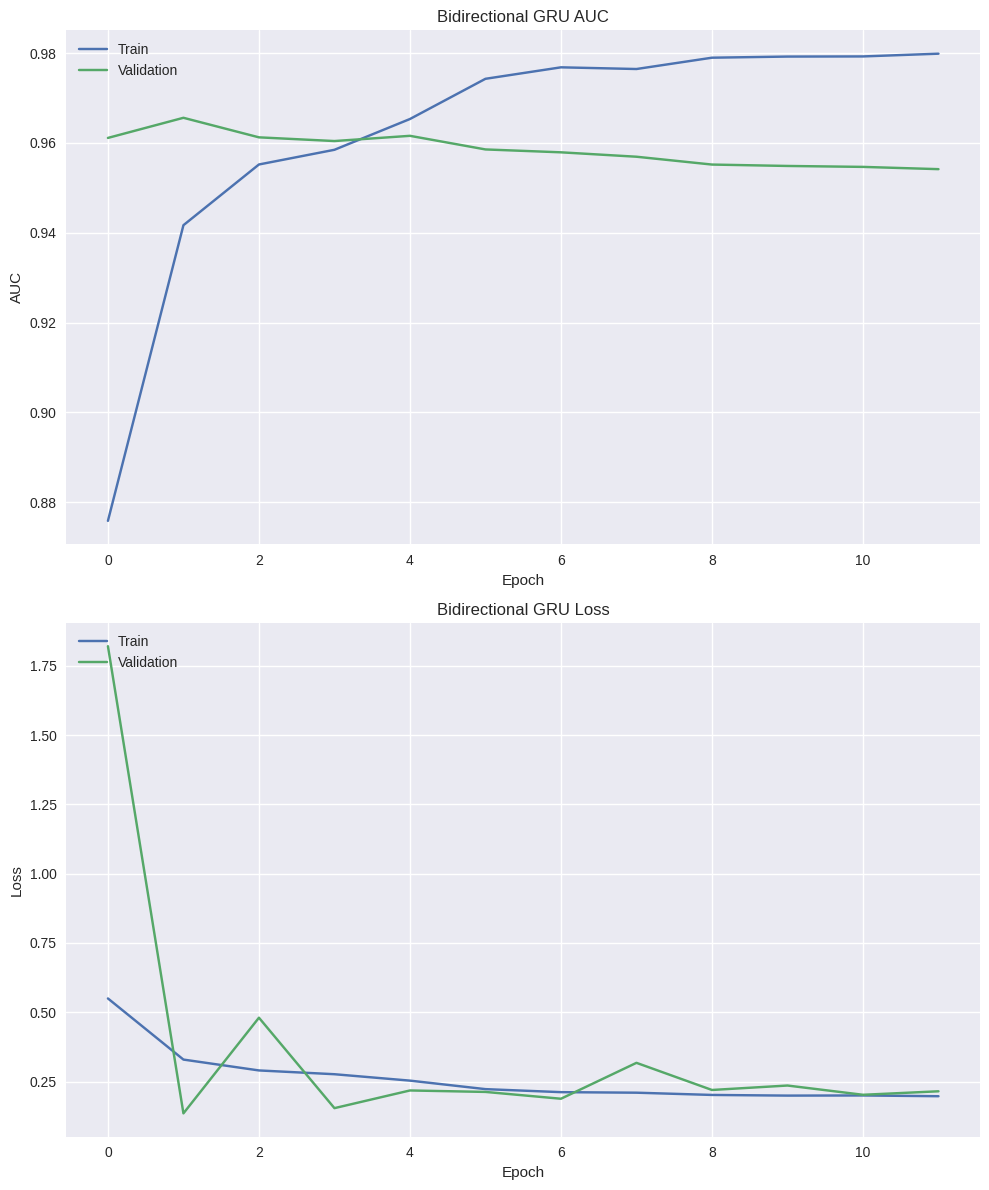

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot AUC
ax1.plot(history4.history['auc'])
ax1.plot(history4.history['val_auc'])
ax1.set_title('Bidirectional GRU AUC')
ax1.set_ylabel('AUC')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper left')

# Plot Loss
ax2.plot(history4.history['loss'])
ax2.plot(history4.history['val_loss'])
ax2.set_title('Bidirectional GRU Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

157/157 [==============================] - 2s 15ms/step
Top features contributing to toxic predictions:
      Feature    Weight
0        shit  0.695284
1       Idiot  0.681109
2        Fuck  0.661173
3   hypocrite  0.429682
4     FUCKING  0.401163
5      insane  0.244920
6      morons  0.190218
7        DUMB  0.159832
8       MORON  0.118376
9     fucking  0.109121
10       fuck  0.108393
11    violent  0.096753
12       nazi  0.086711
13    Firstly  0.074716
14    allcaps  0.057823
15     stupid  0.050845
16       life  0.035351
17          a  0.033354
18      Death  0.026622
19          I  0.024006


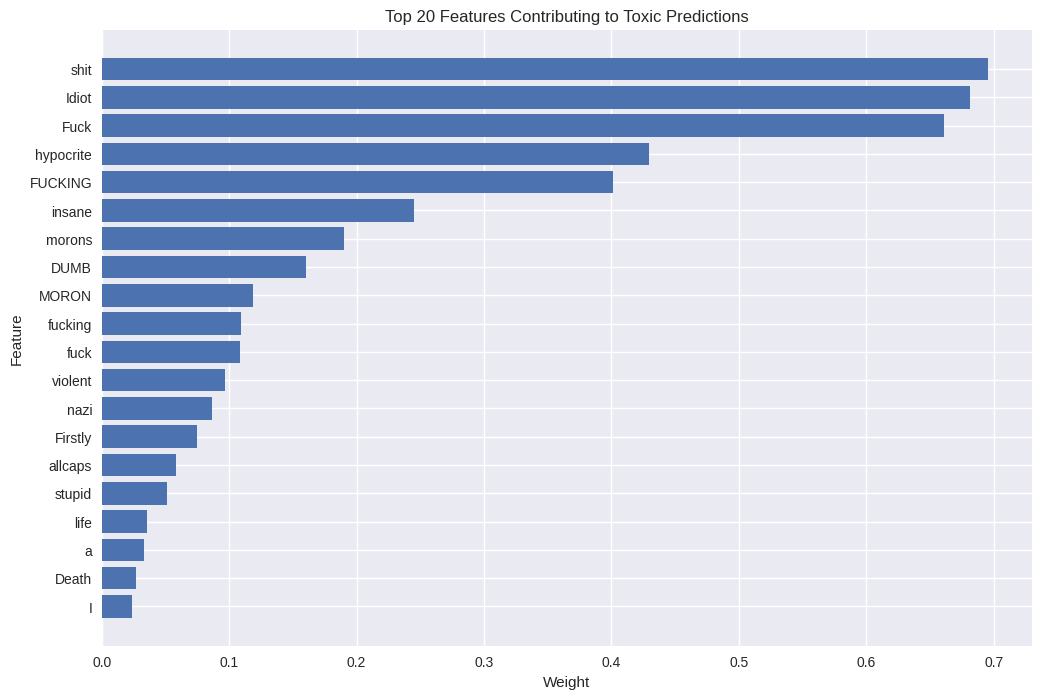

In [ ]:
# LIME interpretability analysis
from collections import Counter
# Define a function to preprocess text and feature data
def preprocess_text_and_features(instance):
    instance_seq = tokenizer.texts_to_sequences([instance])
    instance_pad = pad_sequences(instance_seq, maxlen=max_len)

    # Use average additional features for LIME explanation
    avg_features = np.mean(additional_features_scaled, axis=0)
    avg_features = np.expand_dims(avg_features, axis=0)

    return [instance_pad, avg_features]

# Define a prediction function wrapper for LIME
def predict_with_preprocessing(texts):
    processed_inputs = [preprocess_text_and_features(text) for text in texts]
    text_inputs = np.array([inputs[0] for inputs in processed_inputs]).squeeze()
    feature_inputs = np.array([inputs[1] for inputs in processed_inputs]).squeeze()
    predictions = model_4.predict([text_inputs, feature_inputs])
    return np.hstack((1 - predictions, predictions))  # Adjust shape for LIME

# Initialize LIME Text Explainer
explainer = LimeTextExplainer(class_names=['non-toxic', 'toxic'])

# Choose a sample of data to explain
sample_size = 100  # Number of instances to explain
sample_indices = np.random.choice(df.index, sample_size, replace=False)
sample_texts = df['cleaned_text'].iloc[sample_indices].tolist()
sample_labels = df['oh_label'].iloc[sample_indices].tolist()  # Assuming 'label' contains class labels

# Generate LIME explanations and aggregate the results
toxic_feature_importance = Counter()
non_toxic_feature_importance = Counter()

for i, instance in enumerate(sample_texts):
    exp = explainer.explain_instance(instance, predict_with_preprocessing, num_features=10)
    label = sample_labels[i]
    if label == 1:  # Assuming 1 is toxic
        for feature, weight in exp.as_list():
            toxic_feature_importance[feature] += weight

# Convert to DataFrames for analysis
importance_df_toxic = pd.DataFrame(toxic_feature_importance.items(), columns=['Feature', 'Weight'])
importance_df_toxic = importance_df_toxic.sort_values(by='Weight', ascending=False).reset_index(drop=True)

# Display the top features contributing to each class
print("Top features contributing to toxic predictions:")
print(importance_df_toxic.head(20))



# Plot the feature importance for toxic class
plt.figure(figsize=(12, 8))
plt.barh(importance_df_toxic['Feature'].head(20), importance_df_toxic['Weight'].head(20))
plt.gca().invert_yaxis()
plt.title('Top 20 Features Contributing to Toxic Predictions')
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.show()
